In [75]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('/content/forestfires.csv')

In [58]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [60]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [61]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [62]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


#### **Preprocessing**

Text data included with the numeric data(Month & Days). So we need to encode that in some numeric form before splitting the train test data.

In [63]:
def ordinal_encoding(df,column,ordering):
  df=df.copy()
  df[column]=df[column].apply(lambda x: ordering.index(x))
  return df

In [64]:
def preprocessing(df,task):
  df=df.copy()
  df=ordinal_encoding(
      df,
      column='month',
      ordering=[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'
       ]
  )
  df=ordinal_encoding(
      df,
      column='day',
      ordering=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
  )
  if task=='Regression':
    Y=df['area']
  elif task=='Classification':
    Y=df['area'].apply(lambda x: 1 if x>0 else 0)

  X=df.drop('area',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.65,shuffle=True,random_state=1)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

#### **Splitting & Testing Models:**

In [65]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Regression')

In [66]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.460144,1.330887,0.226770,-0.599195,-0.750425,-0.262938,0.268405,-0.471881,-0.247391,0.426174,0.058891,-0.079936
1,0.603934,-0.246461,0.226770,-0.109342,0.748288,0.383050,0.145783,0.306640,0.240778,-0.140559,0.058891,-0.079936
2,-0.252276,0.542213,-1.913533,0.380511,0.201882,-1.156059,-1.850008,0.019817,-0.281057,-1.085114,0.348181,-0.079936
3,-1.108486,0.542213,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.223944,0.237263,0.058891,-0.079936
4,1.460144,1.330887,-1.913533,0.380511,0.201882,-1.116955,-1.836870,-0.226032,-0.247391,-1.211054,0.868904,-0.079936


In [15]:
X_test.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-1.108486,-1.823808,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.493278,0.803996,-0.461831,-0.079936
1,0.603934,0.542213,0.226770,0.870363,-0.032292,-0.161269,0.326531,-0.000671,-0.701892,0.992907,1.100336,-0.079936
2,-0.252276,1.330887,0.654831,-0.109342,0.514114,-0.411530,0.569386,1.843194,-0.213724,-0.077588,-0.461831,-0.079936
3,-0.680381,-0.246461,0.654831,0.380511,0.451668,0.531643,0.683647,1.023699,-0.045390,0.363204,-0.172541,-0.079936
4,1.032039,-0.246461,0.654831,-0.599195,-0.047903,-0.380248,0.770438,-0.553830,-0.584058,0.866966,0.348181,-0.079936


In [16]:
Y_train.head()

171    2.69
161    1.90
69     0.00
272    3.09
91     0.00
Name: area, dtype: float64

In [17]:
Y_test.head()

270     0.52
90      0.00
133     0.00
221    35.88
224    37.71
Name: area, dtype: float64

**Linear Regression**

In [67]:
#The maximum val. of R^2 can be 1.0 that signifies that Linear Regression is working really well.
#Here R^2 score is 0.02051 which is really low signifying that LinearRegression is not doing well.
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

print("Performance of Linear Regression R^2 metric {:.5f}".format(linear_reg_model.score(X_train,Y_train)))

Performance of Linear Regression R^2 metric 0.02051


**MLP Regressor Model**

In [68]:
# We can see the MLP Regressor Model Works better than Linear Regression,however its works horrible as well.
mlp_reg_model=MLPRegressor().fit(X_train,Y_train)
print("Performance of MLP Regressor Model R^2 metric {:.5f}".format(mlp_reg_model.score(X_train,Y_train)))

Performance of MLP Regressor Model R^2 metric 0.06076


**Decision Tree Regressor**

In [79]:
#R2 score negative not a good fit!
reg = dtr(random_state = 42)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("MSE =", mse(Y_pred, Y_test))
print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test))

MSE = 11084.975803867403
MAE = 25.682707182320442
R2 Score = -11.230687894960365


**Random Forest Regressor**

In [81]:
#This works even worse than Decision Tree Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
print("MSE =", mse(Y_pred, Y_test))
print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test))

MSE = 9900.080101011921
MAE = 22.488793674759876
R2 Score = -588.768145917561


 **Logistic Regression**

In [19]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')

In [20]:
Y_train

171    1
161    1
69     0
272    1
91     0
      ..
129    0
144    1
72     0
235    1
37     0
Name: area, Length: 336, dtype: int64

In [21]:
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,Y_train)

print('Logistic Regression Accuracy, {:.5f}%'.format(log_reg_model.score(X_test,Y_test)*100))

Logistic Regression Accuracy, 53.59116%


**Neural Network Classifier**

In [54]:
nn_classifier_model=MLPClassifier(activation='relu',hidden_layer_sizes=(16,16),n_iter_no_change=100,solver='adam')
nn_classifier_model.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=100, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
print('MLP Classifier Accuracy, {:.5f}%'.format(nn_classifier_model.score(X_test,Y_test)*100))

MLP Classifier Accuracy, 57.45856%


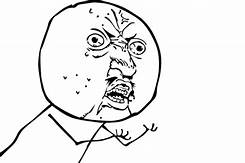

##### None of the models are working good, which is pretty frustrating lmao!After running all these various models we see that MLP Classifier has the best accuracy out of the all.

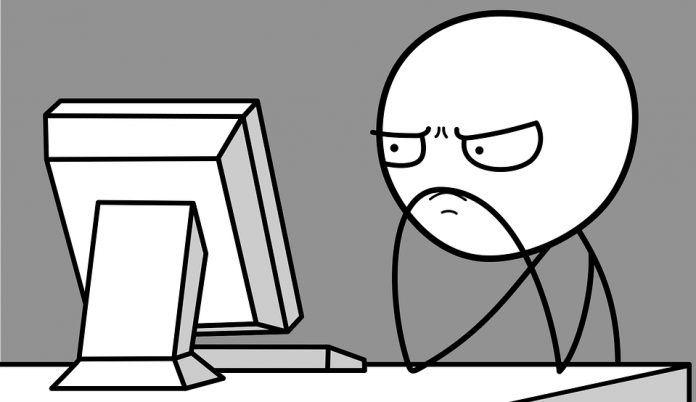